Hussein Hamie
500876254
AER 850 Machine Learning
Assignment 1

We Begin by importing the initial libraries for plotting and data preprocessing

In [1]:
# Importing of libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Function used to import datasets. The function saves X and Y Columns as Numpy arrays and reshapes them in 2D form.

def getdata(filename):
    with open (filename,'r') as csvfile:
        csvData = pd.read_csv(csvfile,header=None)
        #Ordering the data properly
        csvData.sort_values(csvData.columns[0],axis=0,inplace=True)
        print(csvData)
        X = csvData.iloc[:,[0]].to_numpy()
        Y = csvData.iloc[:,[1]].to_numpy()
        print(X)


    return X , Y

In [3]:
#Importing all datasets using get data function and assigning X and Y respectively
X_test, Y_test = getdata("Dataset1/Dataset_1_test.csv")
X_train, Y_train = getdata("Dataset1/Dataset_1_train.csv")
X_valid, Y_valid = getdata("Dataset1/Dataset_1_valid.csv")

           0          1   2
31 -0.988770  -6.497606 NaN
23 -0.913618  -5.110324 NaN
32 -0.895417 -11.813734 NaN
3  -0.860443  -3.800950 NaN
2  -0.819361  -9.321124 NaN
37 -0.789856  -5.923314 NaN
11 -0.780743 -10.921434 NaN
49 -0.758574 -10.768728 NaN
24 -0.698714 -11.098282 NaN
6  -0.627858  -6.709161 NaN
39 -0.618156  -3.162021 NaN
48 -0.499098   2.344141 NaN
12 -0.488943 -10.539182 NaN
13 -0.458625  -3.586555 NaN
8  -0.427498  -3.513751 NaN
35 -0.414263  -6.832803 NaN
0  -0.335254  -2.953401 NaN
33 -0.300863   1.659256 NaN
17 -0.283256  -6.700334 NaN
44 -0.215044  -0.091022 NaN
21 -0.184763  -5.287415 NaN
18 -0.097897  -5.630283 NaN
40 -0.076718  -2.946125 NaN
27 -0.073859  -6.728111 NaN
5  -0.007729  -3.405798 NaN
1   0.122457  -5.836786 NaN
26  0.191167  -0.802697 NaN
36  0.194400  -4.639020 NaN
20  0.232616   0.908847 NaN
41  0.239000  -3.462470 NaN
9   0.352504  -3.073887 NaN
28  0.411078   5.010641 NaN
19  0.419778   1.357183 NaN
4   0.422628   2.100318 NaN
22  0.442216  -4.053

Now we plot all three data sets so we can visualize the distribution we are trying to plot

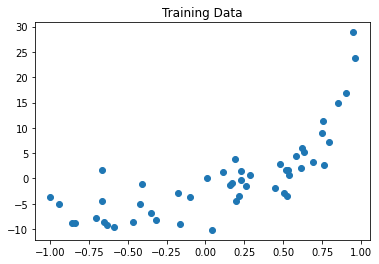

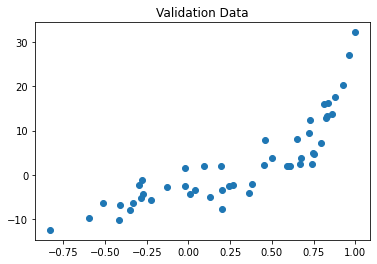

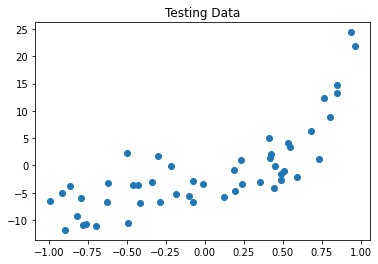

In [4]:
plt.scatter(X_train,Y_train)
plt.title('Training Data')
plt.show()
plt.scatter(X_valid,Y_valid)
plt.title('Validation Data')
plt.show()
plt.scatter(X_test,Y_test)
plt.title('Testing Data')
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error

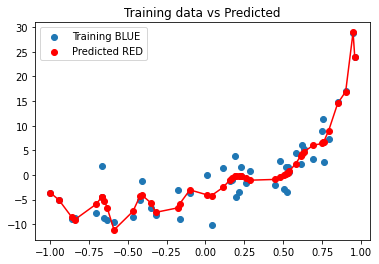

The MSE of the Training data is: 6.4746800650064085


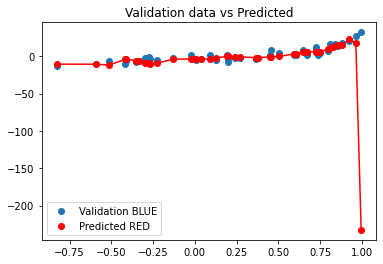

The MSE of the Validation data is: 1418.5143679259286


array([-3.90688268e+00, -1.54838532e+01,  1.55838699e+02,  1.90871415e+03,
       -7.74398740e+03, -3.57222246e+04,  1.27165132e+05,  2.89950110e+05,
       -1.00166864e+06, -1.25374406e+06,  4.38838678e+06,  3.15925023e+06,
       -1.14577838e+07, -4.78462776e+06,  1.82422715e+07,  4.28259629e+06,
       -1.73641577e+07, -2.08243121e+06,  9.07759173e+06,  4.22697493e+05,
       -2.00438306e+06])

In [49]:
polyfitmodel = np.polynomial.Polynomial.fit(X_train.flatten(),Y_train.flatten(),20)

plt.scatter(X_train,Y_train, label = "Training BLUE")
plt.scatter(X_train, polyfitmodel(X_train), color = "r",label = "Predicted RED")
plt.plot(X_train,polyfitmodel(X_train),color = "r")
plt.title("Training data vs Predicted")
plt.legend()

plt.show()
print("The MSE of the Training data is:",mean_squared_error(Y_train,polyfitmodel(X_train)))



plt.scatter(X_valid,Y_valid, label = "Validation BLUE")
plt.scatter(X_valid, polyfitmodel(X_valid), color = "r",label = "Predicted RED")
plt.plot(X_valid,polyfitmodel(X_valid),color = "r")
plt.title("Validation data vs Predicted")
plt.legend()

plt.show()
print("The MSE of the Validation data is:",mean_squared_error(Y_valid,polyfitmodel(X_valid)))
polyfitmodel.convert().coef

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

In [52]:
def poly_features(df,deg):
    df_poly = df.copy()
    if(len(df_poly.shape)==1):
        df_poly=np.array(df_poly).reshape(-1,1)
    if(len(df)==1):
        df_poly=np.array(df_poly).reshape(1,-1)
    poly = PolynomialFeatures(deg)
    df_poly=poly.fit_transform(df_poly)
    return(df_poly)



In [56]:
clf=LinearRegression()

check=poly_features(X_train,20)
model=clf.fit(check,Y_train)
model.coef_

array([[ 0.00000000e+00, -1.54838532e+01,  1.55838699e+02,
         1.90871415e+03, -7.74398740e+03, -3.57222246e+04,
         1.27165132e+05,  2.89950110e+05, -1.00166864e+06,
        -1.25374406e+06,  4.38838678e+06,  3.15925024e+06,
        -1.14577838e+07, -4.78462777e+06,  1.82422715e+07,
         4.28259629e+06, -1.73641577e+07, -2.08243121e+06,
         9.07759174e+06,  4.22697493e+05, -2.00438306e+06]])

[[ -3.63300327]
 [ -5.09430301]
 [ -8.57796031]
 [ -9.09737498]
 [ -5.96456675]
 [ -4.46681095]
 [ -4.47108698]
 [ -5.19357803]
 [ -6.79700558]
 [-11.16530033]
 [ -7.40687656]
 [ -4.34719778]
 [ -4.04929893]
 [ -5.67509157]
 [ -7.59995071]
 [ -6.69325285]
 [ -5.85348526]
 [ -3.03842869]
 [ -4.04797115]
 [ -4.18044653]
 [ -2.54483624]
 [ -0.99562317]
 [ -0.70468904]
 [ -0.292627  ]
 [ -0.27560189]
 [ -0.15102534]
 [ -0.17782287]
 [ -0.18743843]
 [ -0.61276777]
 [ -1.06817893]
 [ -0.91147777]
 [ -0.4544564 ]
 [ -0.11406634]
 [  0.16179756]
 [  0.39869658]
 [  0.43764065]
 [  0.74989654]
 [  2.31549983]
 [  3.88622246]
 [  4.24845476]
 [  4.65859947]
 [  6.01981336]
 [  6.4026354 ]
 [  6.63235373]
 [  6.70227566]
 [  9.01718886]
 [ 14.52011565]
 [ 16.93151853]
 [ 28.96760891]
 [ 23.85568599]]
The MSE of the Training data is: 6.474680065029511


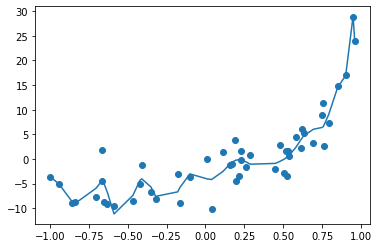

In [68]:
plt.scatter(X_train,Y_train)
ypred = model.predict(poly_features(X_train,20))
print(ypred)
plt.plot(X_train,ypred)
print("The MSE of the Training data is:",mean_squared_error(Y_train,ypred))
